In [1]:
import numpy as np
import pandas as pd

import glob
import os
import matplotlib.pyplot as plt


In [2]:

all_files = glob.glob("./TestResults/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame

,TestResult.DisplayName,TestResult.Outcome,TestResult.Duration,TestResult.ResourceCount
0,invertRecordTck (correctness) (assertion batch 0),Passed,00:00:02.4496921,6382566
1,invertRecordTck (correctness) (assertion batch 0),Passed,00:00:02.2361734,3920752
2,invertRecordTck (correctness) (assertion batch 0),Passed,00:00:01.9620195,5824817
3,invertRecordTck (correctness) (assertion batch 0),Passed,00:00:01.9591562,5158189
4,invertRecordTck (correctness) (assertion batch 0),Passed,00:00:01.9479115,5527792
...,...,...,...,...
34245,util.KeyExists (well-formedness) (assertion ba...,Passed,00:00:00.0380221,60486
34246,util.KeyExists (well-formedness) (assertion ba...,Passed,00:00:00.0378020,60489
34247,util.KeyExists (well-formedness) (assertion ba...,Passed,00:00:00.0376910,60482
34248,util.KeyExists (well-formedness) (assertion ba...,Passed,00:00:00.0362047,60484


In [4]:
def timedelta_to_microseconds(delta):
    return delta.days * 24 * 3600 * 1e6 + delta.seconds * 1e6 + delta.microseconds

In [5]:
#Filter for only correctness
frame = frame[frame['TestResult.DisplayName'].str.contains('\(correctness\)')]

methods = np.array(["soundDirect","soundMonadic","soundBidir","soundSemantic","soundInversionSemantic"])

subframes = {}
for method in methods:
    subframes[method] = frame[frame['TestResult.DisplayName'].str.contains(method)]
    subframes[method]['TestResult.Duration'] = pd.to_timedelta(subframes[method]['TestResult.Duration']).apply(timedelta_to_microseconds)

# directFrame = frame[frame['TestResult.DisplayName'].str.contains('soundDirect')]
# monadicFrame = frame[frame['TestResult.DisplayName'].str.contains('soundMonadic')]
# bidirFrame = frame[frame['TestResult.DisplayName'].str.contains('soundBidir')]
# semanticFrame = frame[frame['TestResult.DisplayName'].str.contains('soundSemantic')]
# inversionSemanticFrame = frame[frame['TestResult.DisplayName'].str.contains('soundInversionSemantic')]

# directFrame['TestResult.Duration'] = pd.to_timedelta(directFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
# monadicFrame['TestResult.Duration'] = pd.to_timedelta(monadicFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
# bidirFrame['TestResult.Duration'] = pd.to_timedelta(bidirFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
# semanticFrame['TestResult.Duration'] = pd.to_timedelta(semanticFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
# inversionSemanticFrame['TestResult.Duration'] = pd.to_timedelta(inversionSemanticFrame['TestResult.Duration']).apply(timedelta_to_microseconds)

/var/folders/rj/yzfg8y3s62x51yphd1_qtjxm0000gq/T/ipykernel_80203/409341278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframes[method]['TestResult.Duration'] = pd.to_timedelta(subframes[method]['TestResult.Duration']).apply(timedelta_to_microseconds)
/var/folders/rj/yzfg8y3s62x51yphd1_qtjxm0000gq/T/ipykernel_80203/409341278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframes[method]['TestResult.Duration'] = pd.to_timedelta(subframes[method]['TestResult.Duration']).apply(timedelta_to_micr

Text(0, 0.5, 'Mean Verification Duration (ms)')

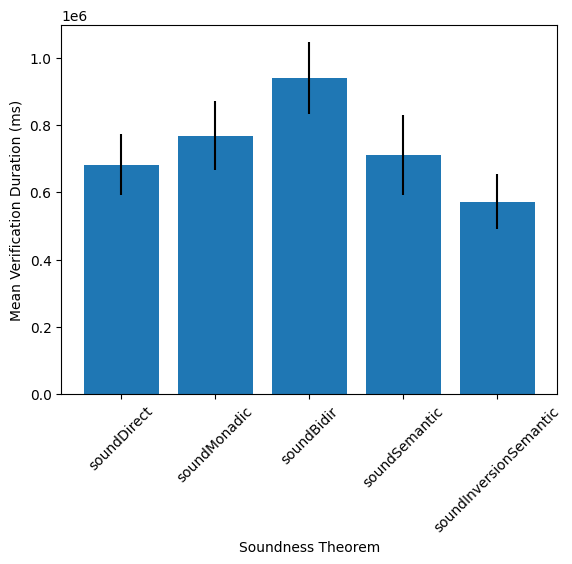

In [6]:
duration_means = {name: table['TestResult.Duration'].mean() for name, table in subframes.items()}
duration_stdevs = {name: table['TestResult.Duration'].std() for name, table in subframes.items()}
plt.bar(duration_means.keys(), duration_means.values(), yerr = duration_stdevs.values())
plt.xticks(rotation=45)
plt.xlabel('Soundness Theorem')
plt.ylabel('Mean Verification Duration (ms)')

Text(0, 0.5, 'Mean Resource Counts')

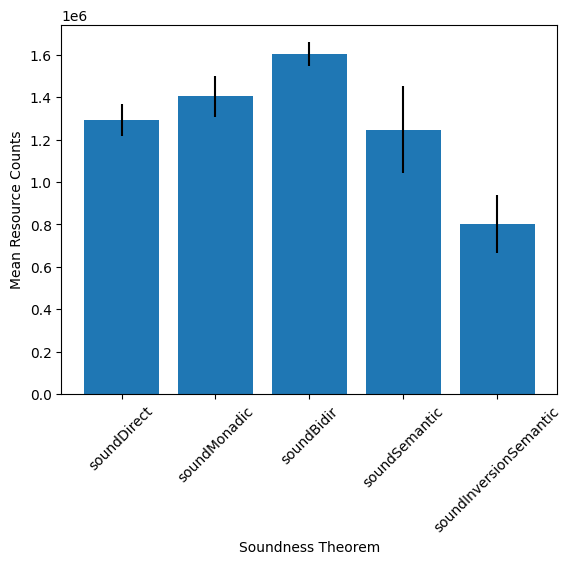

In [10]:
resource_means = {name: table['TestResult.ResourceCount'].mean() for name, table in subframes.items()}
resource_stdevs = {name: table['TestResult.ResourceCount'].std() for name, table in subframes.items()}
plt.bar(resource_means.keys(), resource_means.values(), yerr = resource_stdevs.values())
plt.xticks(rotation=45)
plt.xlabel('Soundness Theorem')
plt.ylabel('Mean Resource Counts')